In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gp
import glob
import os
import codecs
import sys

# hand made functions
sys.path.append("../../modules")
from Rouss import *

In [3]:
folder_path = "../../data/piezos"
df = pd.DataFrame()
for file in glob.glob(os.path.join(folder_path, '*.txt')):
    with codecs.open(file, 'r', encoding='utf-8',
                 errors='ignore') as fdata:
        a = pd.read_csv(fdata,sep="\t")
    if a.shape[1] < 2:
        with codecs.open(file, 'r', encoding='utf-8',
                 errors='ignore') as fdata:
            a = pd.read_csv(fdata,sep="|")
    
    df = df.append(a)

C:\Users\emmal\Anaconda3\lib\site-packages\pandas\core\frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


In [4]:
df['Date de la mesure'] = pd.to_datetime(df['Date de la mesure'])
df.set_index("Date de la mesure",inplace=True)

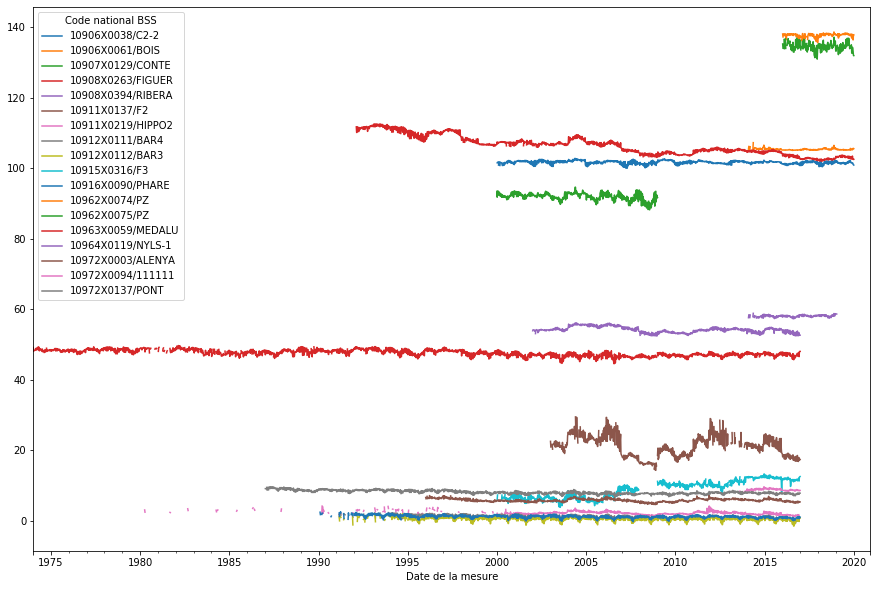

In [5]:
fig,ax = plt.subplots(figsize=(15,10))
df.groupby(["Code national BSS"]).resample("w").mean()["Cte NGF"].unstack().T.plot(ax=ax)

In [6]:
#standard dev
df.groupby(["Code national BSS"]).std()["Cte NGF"]

Code national BSS
10906X0038/C2-2      0.564035
10906X0061/BOIS      0.303719
10907X0129/CONTE     1.320188
10908X0263/FIGUER    1.000580
10908X0394/RIBERA    0.385396
10911X0137/F2        3.101755
10911X0219/HIPPO2    0.484840
10912X0111/BAR4      0.607156
10912X0112/BAR3      0.728726
10915X0316/F3        2.492316
10916X0090/PHARE     0.524939
10962X0074/PZ        0.695809
10962X0075/PZ        1.634465
10963X0059/MEDALU    2.678750
10964X0119/NYLS-1    0.916343
10972X0003/ALENYA    0.482029
10972X0094/111111    0.321458
10972X0137/PONT      0.582351
Name: Cte NGF, dtype: float64

In [7]:
#mean
df.groupby(["Code national BSS"]).mean()["Cte NGF"]

Code national BSS
10906X0038/C2-2      101.706089
10906X0061/BOIS      105.412901
10907X0129/CONTE      92.084083
10908X0263/FIGUER     47.660829
10908X0394/RIBERA     58.130580
10911X0137/F2         20.951576
10911X0219/HIPPO2      2.219113
10912X0111/BAR4        1.187010
10912X0112/BAR3        0.622703
10915X0316/F3          9.001498
10916X0090/PHARE       1.221283
10962X0074/PZ        137.777222
10962X0075/PZ        134.537383
10963X0059/MEDALU    106.333800
10964X0119/NYLS-1     54.224011
10972X0003/ALENYA      5.854341
10972X0094/111111      8.853015
10972X0137/PONT        8.149314
Name: Cte NGF, dtype: float64

In [60]:
def coor_pz(d):
    
    xp = df[df["Code national BSS"]==d.name].X_WGS84.unique()[0]
    yp = df[df["Code national BSS"]==d.name].Y_WGS84.unique()[0]
    return coor_convert(xp,yp,4326,2154)  

Text(0, 0.5, 'Charge (m)')

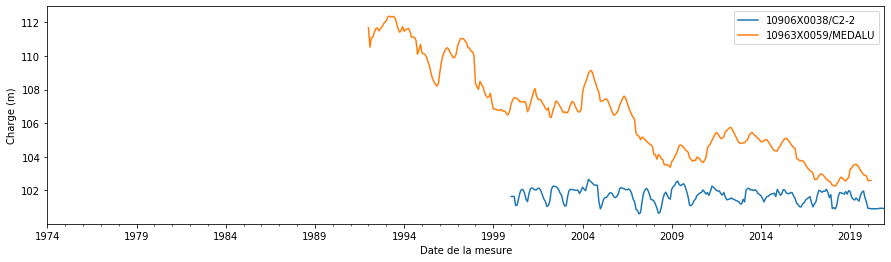

In [84]:
fig,ax=plt.subplots(figsize=(15,4))
d1 = df.groupby(["Code national BSS"]).resample("m").mean()["Cte NGF"].unstack().iloc[0,:]
d2 = df.groupby(["Code national BSS"]).resample("m").mean()["Cte NGF"].unstack().iloc[-5,:]

d1.plot()
d2.plot()
plt.legend()
plt.ylabel("Charge (m)")

In [64]:
coor_pz(d2)

(679737.00120718, 6167674.1982598165)

In [65]:
coor_pz(d1)

(674188.4823639147, 6176301.177019043)

Text(0, 0.5, 'Charge (m)')

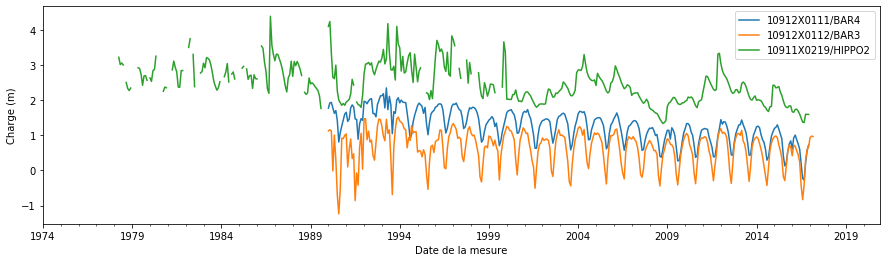

In [85]:
fig,ax=plt.subplots(figsize=(15,4))
d1 = df.groupby(["Code national BSS"]).resample("m").mean()["Cte NGF"].unstack().iloc[7,:]
d2 = df.groupby(["Code national BSS"]).resample("m").mean()["Cte NGF"].unstack().iloc[8,:]
d3 = df.groupby(["Code national BSS"]).resample("m").mean()["Cte NGF"].unstack().iloc[6,:]

d1.plot()
d2.plot()
d3.plot()
plt.legend()
plt.ylabel("Charge (m)")

In [76]:
print(coor_pz(d1),coor_pz(d2),coor_pz(d3))

(703110.6983606532, 6187643.352500888) (703106.8875044525, 6187667.407299312) (696084.4121425018, 6186625.8490245845)
